In [1]:
import rebound
import ctypes
import time
from names import *
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def run(adaptive_mode,binary_sep):
    sim0 = rebound.Simulation()
    rebound.clibrebound.reb_simulation_add_plummer(ctypes.byref(sim0), ctypes.c_int(50), ctypes.c_double(100), ctypes.c_double(1))
    sim = rebound.Simulation()
    for i in range(sim0.N):
        p0 = sim0.particles[i]
        p0.m=0.
        p1 = rebound.Particle(m=0.5)
        p2 = rebound.Particle(m=0.5,a=binary_sep,primary=p1,simulation=sim, inc="uniform",Omega="uniform", omega="uniform")
        sim.add(p0+p1)
        sim.add(p0+p2)
    
    sim.ri_ias15.adaptive_mode = adaptive_mode
    sim.move_to_com()
    E0 = sim.energy()
    start = time.time()
    stop = time.time()
    while sim.t<1 and stop-start<1.:
        sim.integrate(sim.t+1e-2*binary_sep**(3./2.), exact_finish_time=0)
        stop = time.time()
    E1 = sim.energy()
    #print(sim.N, sim.t, (stop-start), np.abs((E1-E0)/E0))
    return sim.t/(stop-start), np.abs((E1-E0)/E0)

In [14]:
Nsamples = 100
binary_sep=np.logspace(-2,-11,Nsamples)
res = np.zeros((3,Nsamples, 2))
for j in range(Nsamples):
    print(j)
    for i, adaptive_mode in enumerate([1,2,3]):
        if adaptive_mode!=1 or binary_sep[j]>=1e-11:
            res[i,j] = run(adaptive_mode,binary_sep=binary_sep[j])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


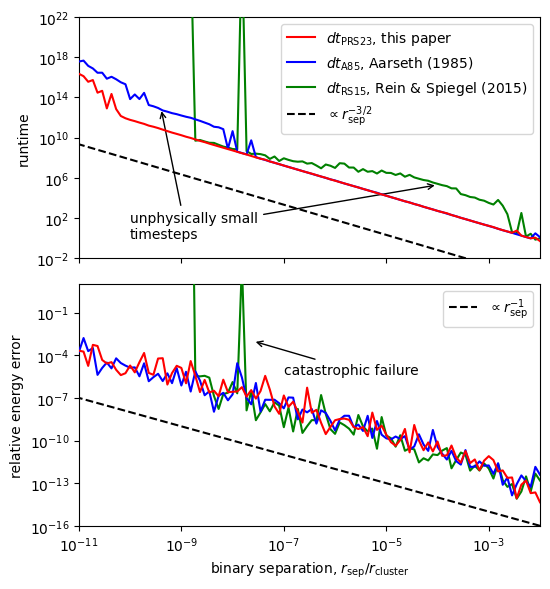

In [51]:
fig, ax = plt.subplots(2,1,sharex=True,figsize=(5.6,6))
ax[1].set_xlabel(r"binary separation, $r_{\mathrm{sep}}/r_{\mathrm{cluster}}$")
ax[0].set_ylabel("runtime")
ax[0].set_yscale("log")
ax[0].set_xscale("log")
ax[0].set_xlim([binary_sep[-1],binary_sep[0]])
ax[0].plot(binary_sep,res[0,0,0]/res[1,:,0], label=labelnew,color="red", zorder=5)
ax[0].plot(binary_sep,res[0,0,0]/np.where(res[2,:,1]<1,res[2,:,0],1e-30*np.ones(Nsamples)), label=labelA85, ls="-", color="blue", zorder=4)
ax[0].plot(binary_sep,res[0,0,0]/np.where(res[0,:,1]<1,res[0,:,0],1e-30*np.ones(Nsamples)), label=labelold, ls="-", color="green", zorder=3)

ax[0].plot(binary_sep,1e-8*binary_sep**(-3./2.)/res[0,0,0],label=r"$\propto r_{\mathrm{sep}}^{-3/2}$",color="black",ls="--", zorder=10)
ax[0].legend()
ax[1].set_ylabel("relative energy error")
ax[1].set_yscale("log")
ax[0].set_ylim([1e-2,1e22])
ax[1].set_ylim([1e-16,1e1])
ax[1].plot(binary_sep,res[1,:,1], color="red", zorder=5)
ax[1].plot(binary_sep,res[2,:,1], color="blue", zorder=4)
ax[1].plot(binary_sep,res[0,:,1], color="green", zorder=3)
ax[1].plot(binary_sep,1e-18*binary_sep**(-1.),label=r"$\propto r_{\mathrm{sep}}^{-1}$",color="black",ls="--", zorder=10)
ax[1].legend()

ax[0].annotate("unphysically small\ntimesteps", xy=(1e-4, 2e5), xytext=(1e-10, 1e0),
            arrowprops=dict(arrowstyle="->", facecolor='black'),
            )
ax[0].annotate("", xy=(0.4e-9, 0.8e13), xytext=(1e-9, 1e3),
            arrowprops=dict(arrowstyle="->", facecolor='black'),
            )

ax[1].annotate("catastrophic failure", xy=(0.25e-7, 1e-3), xytext=(1e-7, 0.5e-5),
            arrowprops=dict(arrowstyle="->", facecolor='black'),
              )



fig.tight_layout()

fig.savefig("cluster.png",dpi=500)